In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import numpy
import pandas
import sklearn

print("Python:", sys.version)
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Scikit-Learn:", sklearn.__version__)


Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
NumPy: 2.0.2
Pandas: 2.2.2
Scikit-Learn: 1.6.1


In [ ]:
import matplotlib
import seaborn

print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", seaborn.__version__)


Matplotlib: 3.10.0
Seaborn: 0.13.2


In [ ]:
import shap
import lightgbm
import xgboost

print("SHAP:", shap.__version__)
print("LightGBM:", lightgbm.__version__)
print("XGBoost:", xgboost.__version__)


SHAP: 0.47.2
LightGBM: 4.5.0
XGBoost: 2.1.4


In [ ]:
import pandas as pd
from google.colab import files


df = pd.read_csv('/content/drive/MyDrive/fc25_experiment.csv')


print("Unique position groups:", df['position_group'].unique())


position_dummies = pd.get_dummies(df['position_group'], prefix='position_group').astype(int)
df_encoded = pd.concat([df.drop('position_group', axis=1), position_dummies], axis=1)


df_encoded.to_csv("fc25_encoded.csv", index=False)


files.download("fc25_encoded.csv")



Unique position groups: ['Attacker' 'Midfielder' 'Goalkeeper' 'Defender']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split


X = df_encoded.copy()
y = df_encoded['market_value_million']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)


print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Position distribution in test set:")
print(df.loc[X_test.index, 'position'].value_counts(normalize=True))


,count
position,
CB,2796
ST,2097
CM,1814
GK,1669
CDM,1278
RB,1229
LB,1171
LM,944
CAM,919


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/drive/MyDrive/male_fc25.csv')

# 创建新的列
df['market_value_million'] = df['market_value_in_eur'] / 1_000_000
df['log_market_value'] = np.log1p(df['market_value_in_eur'])

# 保存为新文件（UTF-8编码）
df.to_csv('male_fc25_transformed.csv', index=False, encoding='utf-8')

print("✅ 新文件已保存为 male_fc25_transformed.csv，包含百万单位和对数变换列。")


✅ 新文件已保存为 male_fc25_transformed.csv，包含百万单位和对数变换列。


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/male_fc25_transformed.csv')

# 计算描述性统计
market_stats = df['market_value_million'].describe(percentiles=[.25, .5, .75]).rename({
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std',
    'min': 'Min',
    '25%': '25%',
    '50%': 'Median',
    '75%': '75%',
    'max': 'Max'
})

# 显示表格
print("Descriptive Statistics of Market Value:")
print(market_stats.to_frame())


Descriptive Statistics of Market Value:
        market_value_million
Count           15463.000000
Mean                3.008016
Std                 8.801246
Min                 0.010000
25%                 0.250000
Median              0.600000
75%                 2.000000
Max               200.000000


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# 1. 读取 CSV 文件（将你的文件上传到 Colab 后获取路径）
df = pd.read_csv('/content/drive/MyDrive/male_fc25_transformed.csv')

# 2. 设定目标变量和数值型特征列表
target = 'market_value_million'
features = [
    'rank', 'ovr', 'pac', 'sho', 'pas', 'dri', 'def', 'phy',
    'acceleration', 'sprint_speed', 'positioning', 'finishing', 'shot_power',
    'long_shots', 'volleys', 'penalties', 'vision', 'crossing',
    'free_kick_accuracy', 'short_passing', 'long_passing', 'curve',
    'dribbling', 'agility', 'balance', 'reactions', 'ball_control', 'composure',
    'interceptions', 'heading_accuracy', 'def_awareness', 'standing_tackle',
    'sliding_tackle', 'jumping', 'stamina', 'strength', 'aggression',
    'weak_foot', 'skill_moves', 'age', 'height_cm', 'weight_kg'
]

# 3. 计算 Pearson r 值
correlations = []
for feature in features:
    r, _ = pearsonr(df[feature], df[target])
    correlations.append((feature, round(r, 3)))

# 4. 按绝对值排序
sorted_correlations = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# 5. 显示结果
for feature, r in sorted_correlations:
    print(f"{feature}: {r}")



ovr: 0.489
reactions: 0.437
rank: -0.4
dri: 0.36
composure: 0.343
pas: 0.335
vision: 0.296
short_passing: 0.289
long_passing: 0.268
shot_power: 0.264
ball_control: 0.262
dribbling: 0.239
curve: 0.224
sho: 0.223
skill_moves: 0.217
positioning: 0.206
volleys: 0.204
long_shots: 0.203
finishing: 0.201
crossing: 0.2
pac: 0.197
phy: 0.186
sprint_speed: 0.174
free_kick_accuracy: 0.169
aggression: 0.169
stamina: 0.168
penalties: 0.166
acceleration: 0.164
jumping: -0.164
agility: 0.161
heading_accuracy: 0.16
weak_foot: 0.135
def: 0.132
def_awareness: 0.122
interceptions: 0.12
standing_tackle: 0.119
balance: 0.113
sliding_tackle: 0.102
strength: 0.102
age: -0.098
height_cm: 0.022
weight_kg: 0.001


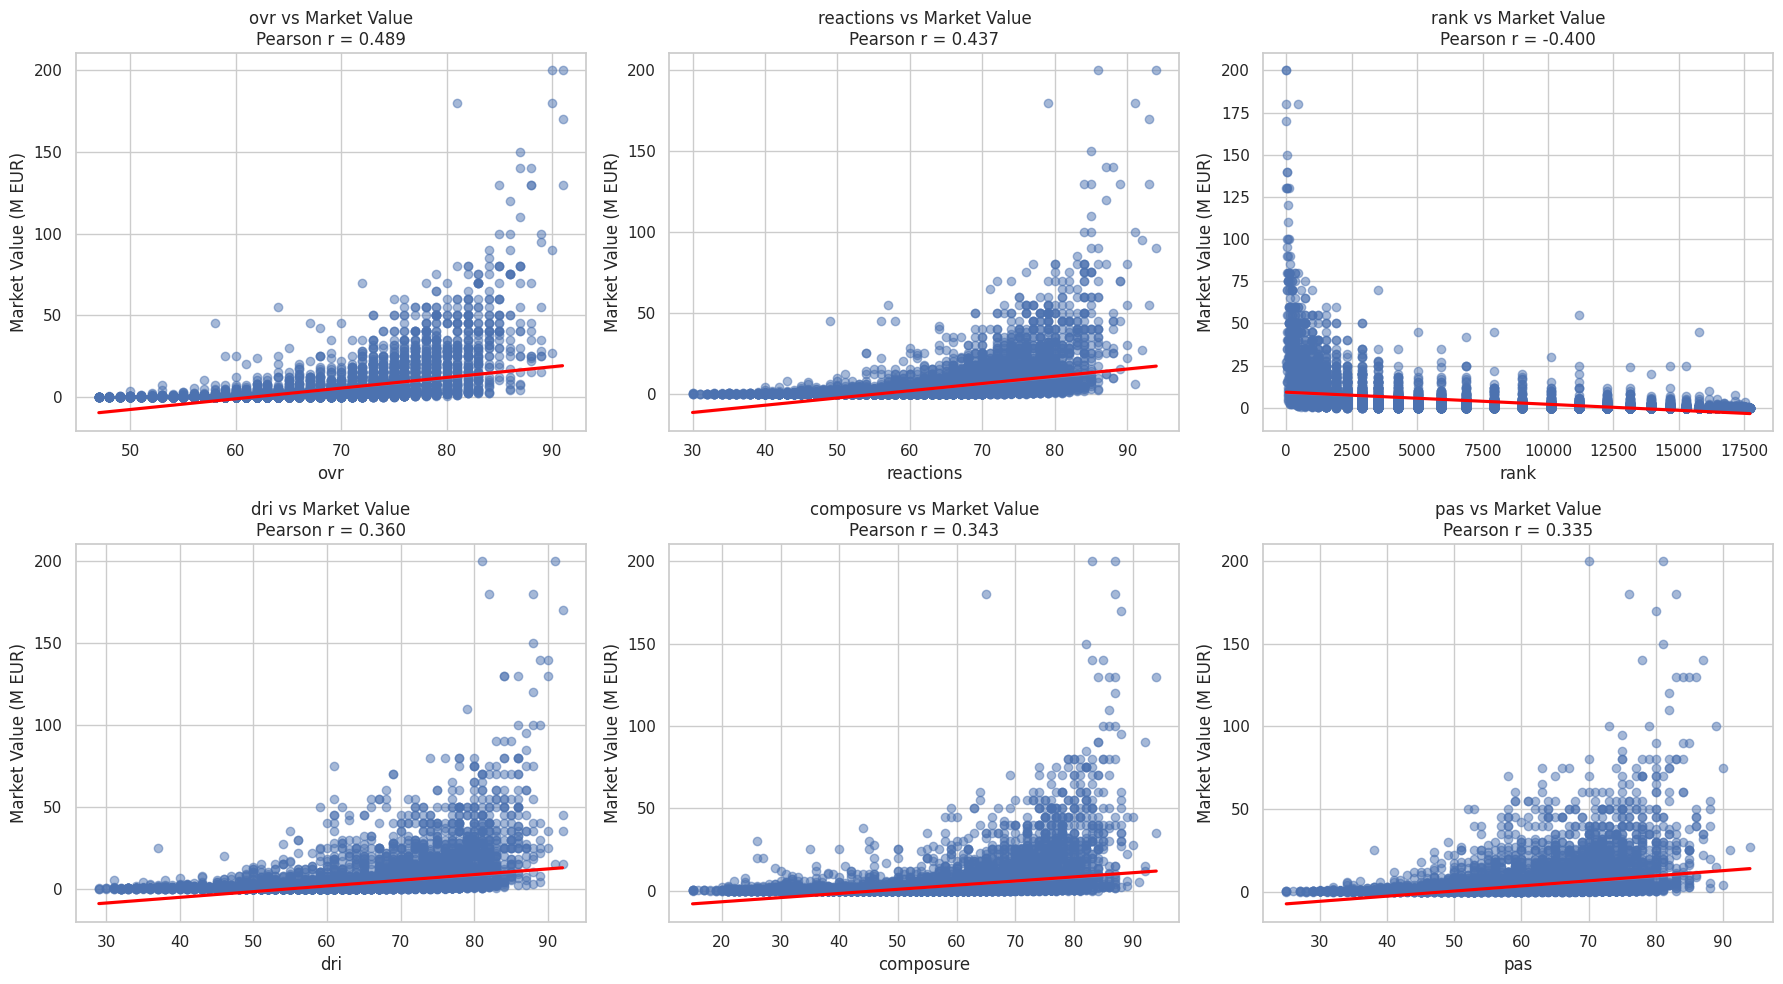

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 设置图像风格
sns.set(style="whitegrid")
features = ['ovr', 'reactions', 'rank', 'dri', 'composure', 'pas']

# 创建子图
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 绘图并添加 Pearson 相关系数
for i, feature in enumerate(features):
    ax = axes[i]
    sns.regplot(x=df[feature], y=df['market_value_million'], ax=ax, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    r, _ = pearsonr(df[feature], df['market_value_million'])
    ax.set_title(f"{feature} vs Market Value\nPearson r = {r:.3f}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Market Value (M EUR)")

plt.tight_layout()
plt.show()


In [ ]:
market_stats_log = df['log_market_value'].describe(percentiles=[.25, .5, .75]).rename({
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std',
    'min': 'Min',
    '25%': '25%',
    '50%': 'Median',
    '75%': '75%',
    'max': 'Max'
})

# 显示表格
print("Descriptive Statistics of log(Market Value):")
print(market_stats_log.to_frame())


Descriptive Statistics of log(Market Value):
        log_market_value
Count       15463.000000
Mean           13.465124
Std             1.582357
Min             9.210440
25%            12.429220
Median         13.304687
75%            14.508658
Max            19.113828


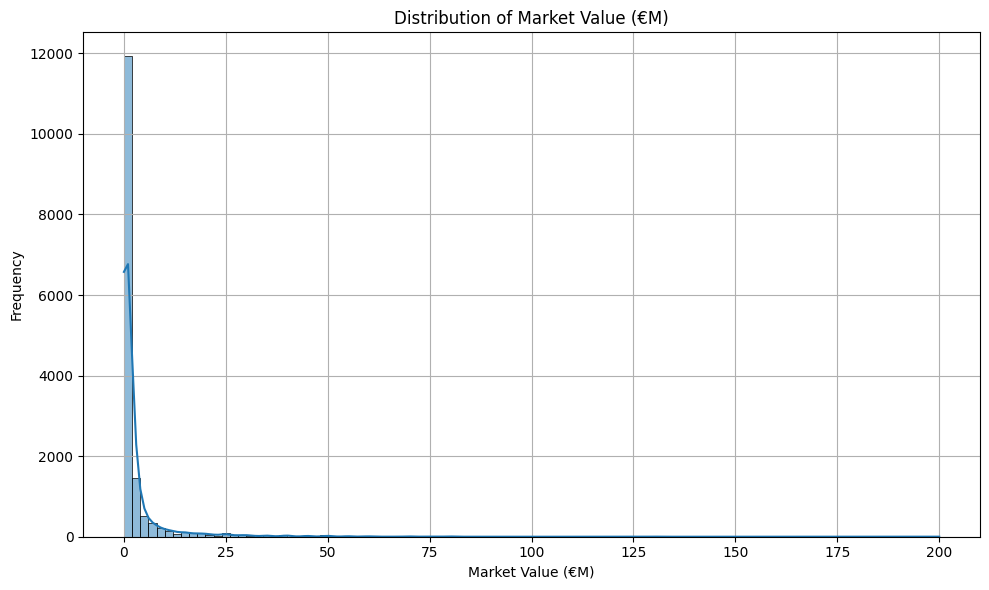

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['market_value_million'], bins=100, kde=True)
plt.title("Distribution of Market Value (€M)")
plt.xlabel("Market Value (€M)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

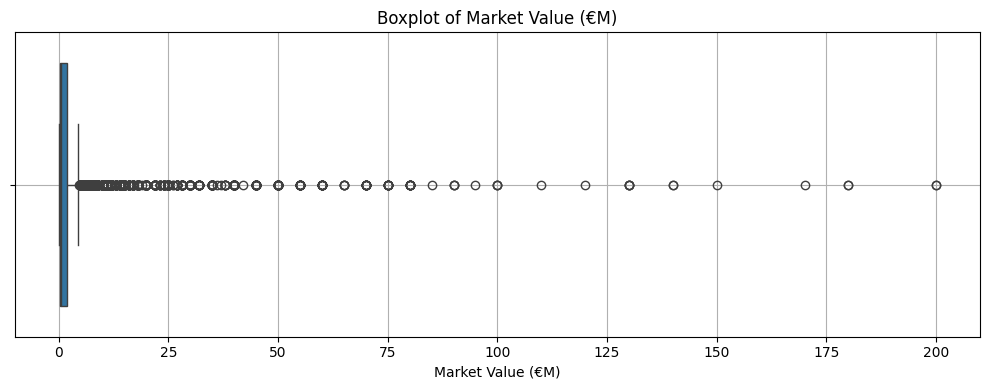

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['market_value_million'])
plt.title("Boxplot of Market Value (€M)")
plt.xlabel("Market Value (€M)")
plt.grid(True)
plt.tight_layout()
plt.show()


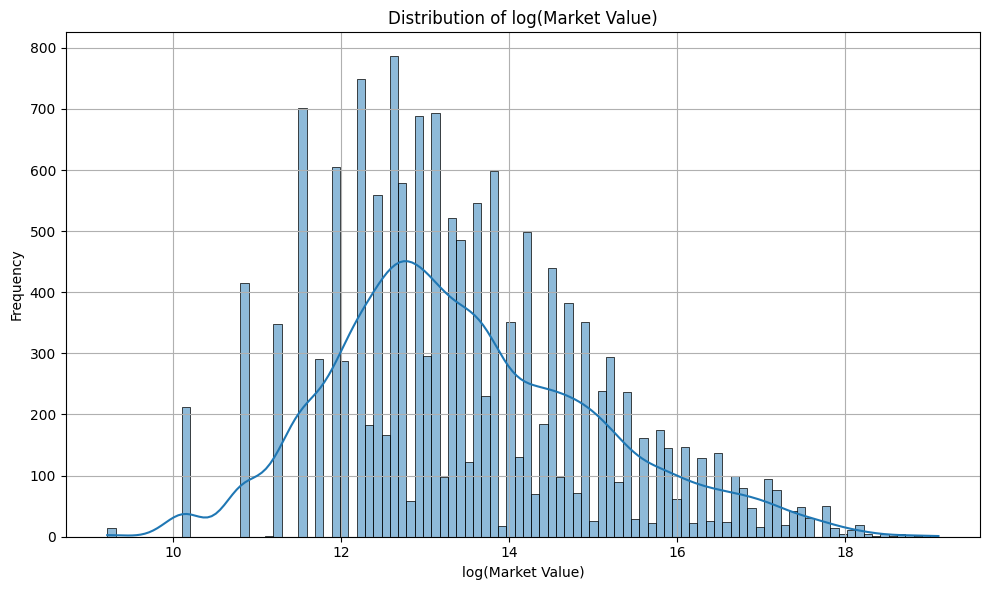

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_market_value'], bins=100, kde=True)
plt.title("Distribution of log(Market Value)")
plt.xlabel("log(Market Value)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

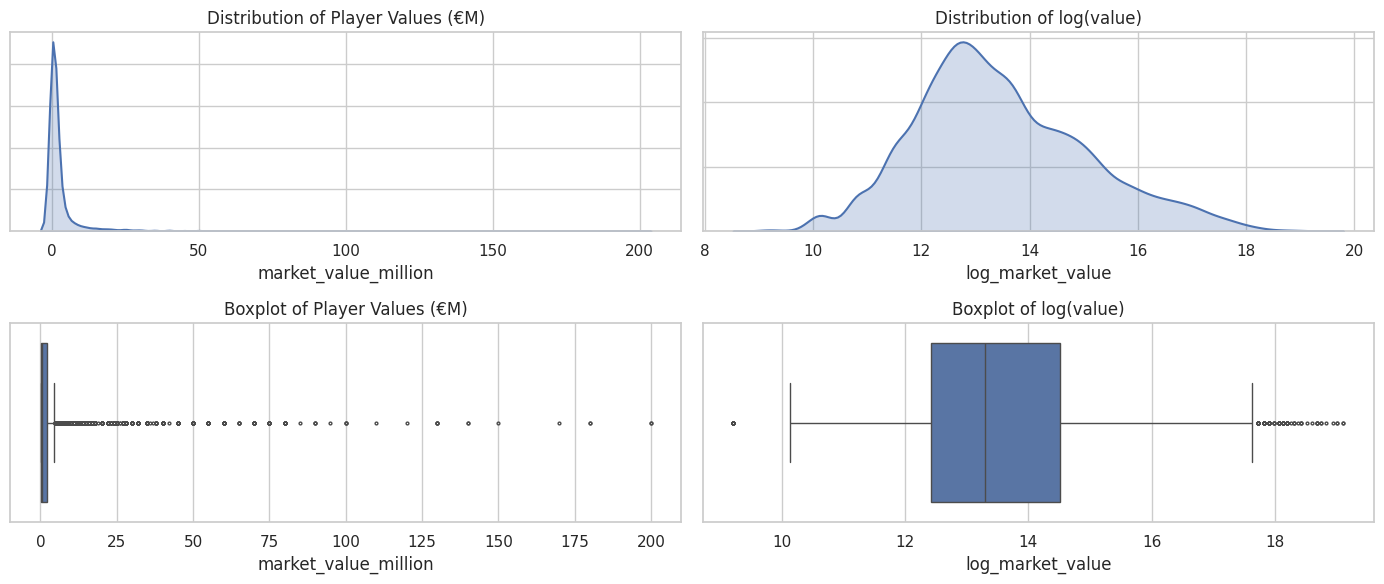

In [ ]:




# 设置图形风格
sns.set(style="whitegrid")

# 创建图形区域
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# 左上：单位为百万的分布图（平滑曲线，不显示Y轴）
sns.kdeplot(df['market_value_million'], ax=axes[0, 0], fill=True, linewidth=1.5)
axes[0, 0].set_title("Distribution of Player Values (€M)")
axes[0, 0].set_ylabel("")
axes[0, 0].tick_params(axis='y', left=False, labelleft=False)

# 左下：箱线图（百万欧元）
sns.boxplot(x=df['market_value_million'], ax=axes[1, 0], fliersize=2)
axes[1, 0].set_title("Boxplot of Player Values (€M)")

# 右上：log值分布（平滑曲线）
sns.kdeplot(df['log_market_value'], ax=axes[0, 1], fill=True, linewidth=1.5)
axes[0, 1].set_title("Distribution of log(value)")
axes[0, 1].set_ylabel("")
axes[0, 1].tick_params(axis='y', left=False, labelleft=False)

# 右下：log值箱线图
sns.boxplot(x=df['log_market_value'], ax=axes[1, 1], fliersize=2)
axes[1, 1].set_title("Boxplot of log(value)")

# 调整布局
plt.tight_layout()
plt.show()

<ipython-input-24-d484497cf495>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_percentage.values, y=position_percentage.index, palette='Blues_d')


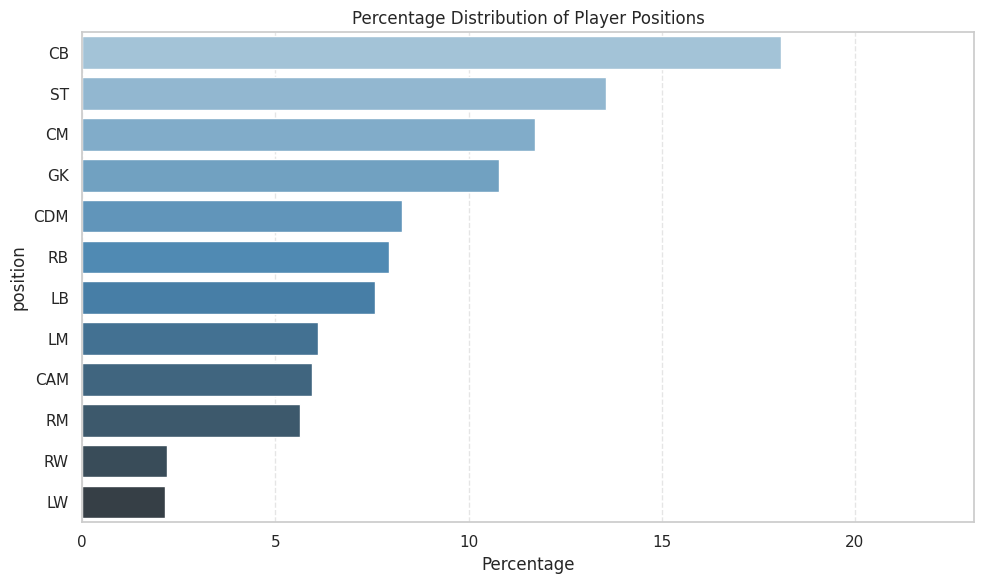

In [ ]:
position_percentage = df['position'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=position_percentage.values, y=position_percentage.index, palette='Blues_d')
plt.xlabel('Percentage')
plt.title("Percentage Distribution of Player Positions")
plt.xlim(0, max(position_percentage.values) + 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
unique_positions = df['position'].value_counts().reset_index()
unique_positions.columns = ['position', 'count']
unique_positions

,position,count
0,CB,2796
1,ST,2097
2,CM,1814
3,GK,1669
4,CDM,1278
5,RB,1229
6,LB,1171
7,LM,944
8,CAM,919
9,RM,873


In [ ]:
position_to_group = {
    'CB': 'Defender',
    'RB': 'Defender',
    'LB': 'Defender',
    'ST': 'Attacker',
    'RW': 'Attacker',
    'LW': 'Attacker',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'LM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'GK': 'Goalkeeper'
}

df['position_group'] = df['position'].map(position_to_group)

# 检查映射结果

df.to_csv('/content/drive/MyDrive/fc25_with_position_groups.csv', index=False)

<ipython-input-9-1025265048>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


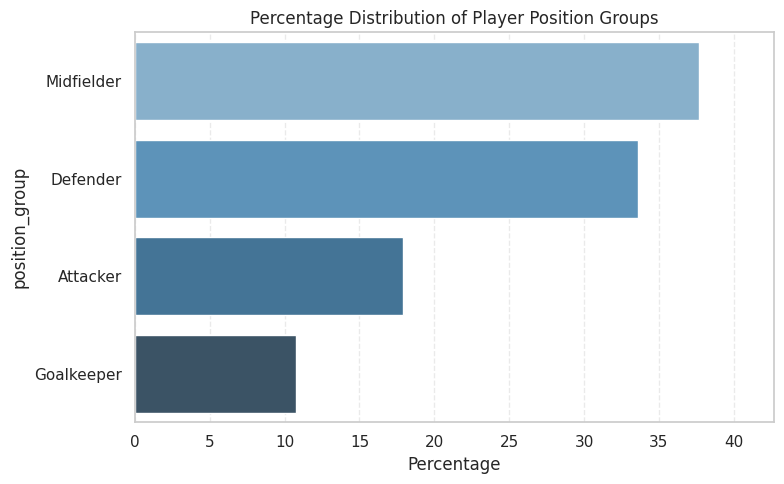

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fc25_with_position_groups.csv')

group_pct = df['position_group'].value_counts(normalize=True).sort_values(ascending=False) * 100

# 设置风格
sns.set(style="whitegrid")

# 使用和上面图一样的调色板（Blues_d）
plt.figure(figsize=(8, 5))
sns.barplot(
    x=group_pct.values,
    y=group_pct.index,
    palette=sns.color_palette("Blues_d", n_colors=len(group_pct))
)

# 图表标题和坐标轴
plt.xlabel("Percentage")
plt.title("Percentage Distribution of Player Position Groups")
plt.xlim(0, max(group_pct.values) + 5)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
unique_position_groups = df['position_group'].value_counts().reset_index()
unique_position_groups.columns = ['position_group', 'count']
unique_position_groups

,position_group,count
0,Midfielder,5828
1,Defender,5196
2,Attacker,2770
3,Goalkeeper,1669


<ipython-input-11-3426274658>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


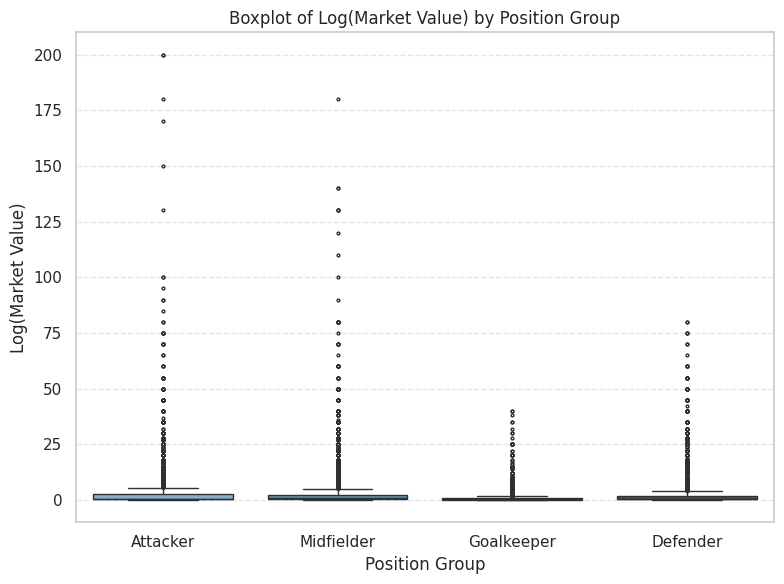

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='position_group',
    y='market_value_million',
    data=df,
    palette=sns.color_palette("Blues_d", n_colors=df['position_group'].nunique()),
    fliersize=2
)

# 设置标题和标签
plt.title("Boxplot of Log(Market Value) by Position Group")
plt.xlabel("Position Group")
plt.ylabel("Log(Market Value)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-13-1902997449>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-13-1902997449>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


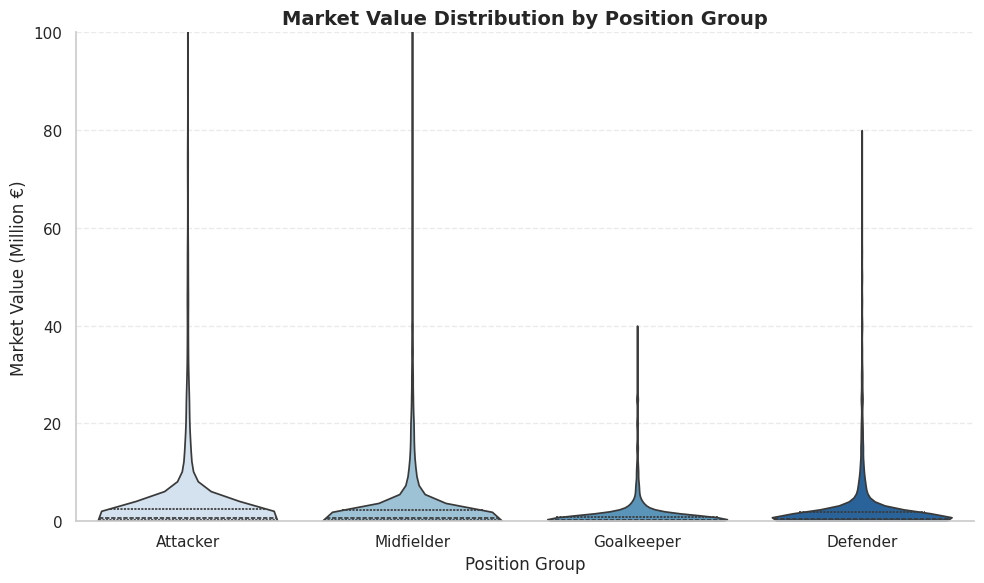

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='position_group',
    y='market_value_million',
    data=df,
    palette="Blues",
    cut=0,                  # 不延展到异常值之外
    inner="quartile",       # 显示四分位数
    scale='width'           # 每组宽度一致
)

plt.title("Market Value Distribution by Position Group", fontsize=14, fontweight='bold')
plt.xlabel("Position Group", fontsize=12)
plt.ylabel("Market Value (Million €)", fontsize=12)
plt.ylim(0, 100)  # 可调上限
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.show()



<ipython-input-15-2071190642>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-15-2071190642>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


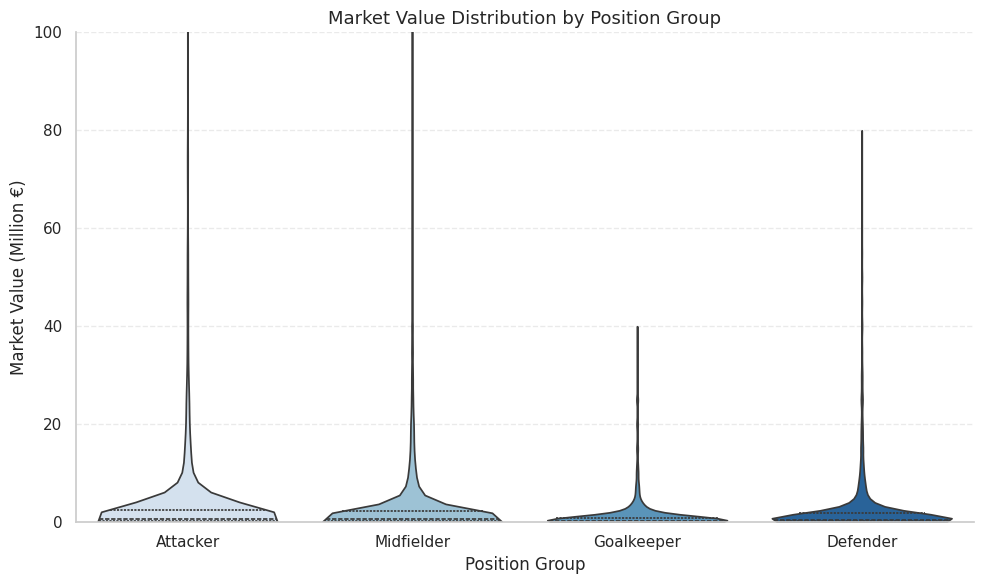

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 seaborn 主题（更简洁的白色背景）
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# 绘制 violin plot
sns.violinplot(
    x='position_group',
    y='market_value_million',
    data=df,
    palette="Blues",
    cut=0,                  # 不超出最大值
    inner="quartile",       # 显示四分位数
    scale="width"
)

# 精致字体设置（去粗体，使用正常字号）
plt.title("Market Value Distribution by Position Group", fontsize=13)  # 不加粗
plt.xlabel("Position Group", fontsize=12)
plt.ylabel("Market Value (Million €)", fontsize=12)

# 坐标轴字体小一点、无加粗
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# 可选：限制上限更聚焦主力球员分布（你可自行调节）
plt.ylim(0, 100)

# 去边框、加虚线网格
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)

# 自动调整布局
plt.tight_layout()
plt.show()


<ipython-input-17-3574689698>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-17-3574689698>:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


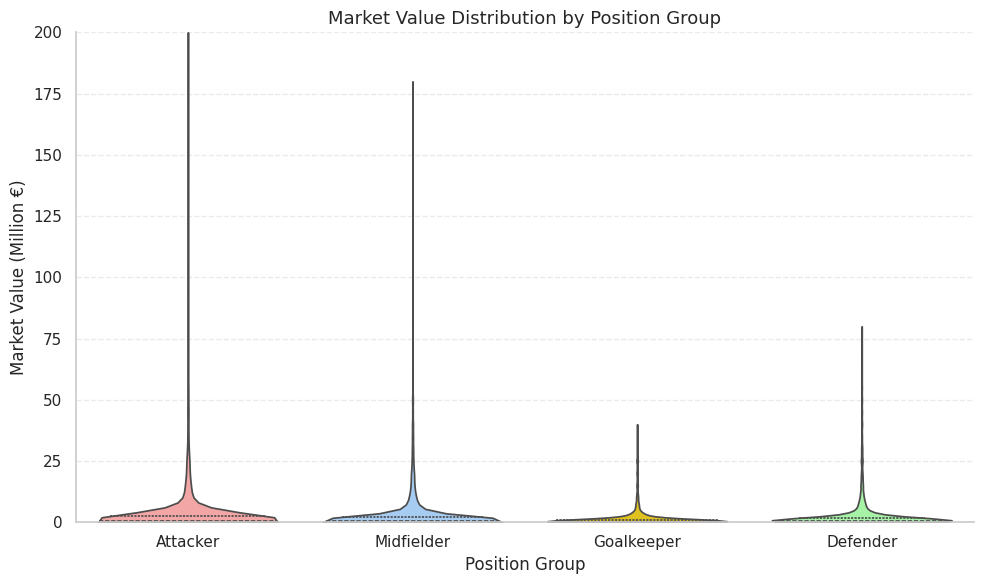

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置主题
sns.set_theme(style="whitegrid")

# 自定义每组颜色（你也可以换一套喜欢的）
custom_palette = {
    "Attacker": "#FF9999",     # 柔粉红
    "Midfielder": "#99CCFF",   # 天蓝色
    "Defender": "#99FF99",     # 淡绿色
    "Goalkeeper": "#FFD700"    # 金黄色
}

plt.figure(figsize=(10, 6))

# 绘制 violin plot
sns.violinplot(
    x='position_group',
    y='market_value_million',
    data=df,
    palette=custom_palette,
    cut=0,
    inner="quartile",
    scale="width"
)

# 美化字体
plt.title("Market Value Distribution by Position Group", fontsize=13)
plt.xlabel("Position Group", fontsize=12)
plt.ylabel("Market Value (Million €)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# 限制最大市场价值（可调整）
plt.ylim(0, 200)

# 网格和边框美化
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [ ]:
summary_table = df.groupby('position_group')['market_value_million'].agg(['count', 'mean', 'median']).reset_index()
summary_table['mean'] = summary_table['mean']
summary_table['median'] = summary_table['median']
summary_table.columns = ['Position Group', 'Count', 'Mean (M€)', 'Median (M€)']

print(summary_table.to_string(index=False))

Position Group  Count  Mean (M€)  Median (M€)
      Attacker   2770   3.954554         0.65
      Defender   5196   2.614613         0.50
    Goalkeeper   1669   1.472166         0.30
    Midfielder   5828   3.348705         0.70


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fc25_with_position_groups.csv')

missing_values = df[['alternative_positions', 'play_style']].isnull().sum()
missing_values

,0
alternative_positions,6804
play_style,8128


In [ ]:
# 用 utf-8 编码重新读取原始文件（以确保字符正常）
df_mv_utf8 = pd.read_csv('/content/drive/MyDrive/fc25_with_position_groups.csv', encoding="utf-8")

# 检查 League 列中的唯一值（已去除缺失）
unique_leagues_mv_utf8 = sorted(df_mv_utf8['league'].dropna().unique())
unique_leagues_mv_utf8


['1A Pro League',
 '3. Liga',
 '3F Superliga',
 '?. Bundesliga',
 '?eská Liga',
 'A-League',
 'Allsvenskan',
 'Bundesliga',
 'Bundesliga 2',
 'CSL',
 'CSSL',
 'EFL Championship',
 'EFL League One',
 'EFL League Two',
 'Eliteserien',
 'Eredivisie',
 'Finnliiga',
 'Hellas Liga',
 'ISL',
 'K League 1',
 'LALIGA EA SPORTS',
 'LALIGA HYPERMOTION',
 'Libertadores',
 'Liga Azerbaijan',
 'Liga Colombia',
 'Liga Cyprus',
 'Liga Hrvatska',
 'Liga Portugal',
 "Ligue 1 McDonald's",
 'Ligue 2 BKT',
 'MLS',
 'Magyar Liga',
 'PKO BP Ekstraklasa',
 'Premier League',
 'Primera División',
 'ROSHN Saudi League',
 'SSE Airtricity PD',
 'SUPERLIGA',
 'Scottish Prem',
 'Serie A Enilive',
 'Serie BKT',
 'Sudamericana',
 'Trendyol Süper Lig',
 'Ukrayina Liha',
 'United Emirates League']

In [ ]:
df['league'] = df['league'].replace({
    '?. Bundesliga': 'Österreichische Bundesliga',
    '?eská Liga': 'Česká Liga'
})


In [ ]:
# 显示替换后的联赛名称中是否还存在旧值
print(df['league'].unique())

# 或者只看是否还有乱码项
print(df[df['league'].str.contains(r'\?')]['league'].value_counts())


['LALIGA EA SPORTS' 'Premier League' 'Bundesliga' "Ligue 1 McDonald's"
 'Serie A Enilive' 'MLS' 'ROSHN Saudi League' 'Liga Portugal'
 'Libertadores' 'Serie BKT' 'Trendyol Süper Lig' 'Eredivisie'
 '1A Pro League' 'Liga Hrvatska' 'Scottish Prem' 'Primera División'
 'Hellas Liga' 'United Emirates League' 'Česká Liga' 'Magyar Liga' 'CSL'
 'Sudamericana' 'Ukrayina Liha' 'LALIGA HYPERMOTION'
 'Österreichische Bundesliga' 'EFL Championship' 'Ligue 2 BKT'
 'Liga Colombia' 'Bundesliga 2' 'Eliteserien' '3F Superliga' 'K League 1'
 'CSSL' 'PKO BP Ekstraklasa' 'A-League' 'Allsvenskan' 'Liga Cyprus'
 'Liga Azerbaijan' 'SUPERLIGA' 'EFL League One' 'ISL' '3. Liga'
 'SSE Airtricity PD' 'EFL League Two' 'Finnliiga']
Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd
from google.colab import files  # 确保这一行在顶部



# 删除两列
df_cleaned = df.drop(columns=['alternative_positions', 'play_style', 'team'])

# 保存处理后的新文件
cleaned_filename = 'fc25_cleaned.csv'
df_cleaned.to_csv(cleaned_filename, index=False)

# 下载文件
files.download(cleaned_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
unique_teams = df['team'].nunique()
unique_teams

657

In [ ]:
unique_leagues = df['league'].nunique()
unique_leagues

45

In [ ]:
unique_nations = df['nation'].nunique()
unique_nations

152

In [ ]:
# 将 'preferred_foot' 列中的 Left 转为 -1，Right 转为 1
df['preferred_foot_encoded'] = df['preferred_foot'].map({'Left': -1, 'Right': 1})

# 如果你希望直接替换原列（而不是创建新列），可以用这行：
# df['preferred_foot'] = df['preferred_foot'].map({'Left': -1, 'Right': 1})

# 查看前几行确认是否转换成功
print(df[['preferred_foot', 'preferred_foot_encoded']].head())


  preferred_foot  preferred_foot_encoded
0          Right                       1
1          Right                       1
2           Left                      -1
3          Right                       1
4          Right                       1


In [ ]:
# 将 'preferred_foot' 映射为 -1 和 1
df['preferred_foot_encoded'] = df['preferred_foot'].map({'Left': -1, 'Right': 1})

# 保存为新文件
output_filename = 'fc25_cleaned_with_encoded_foot.csv'
df.to_csv(output_filename, index=False)

# 下载文件
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files
df = pd.read_csv('/content/drive/MyDrive/fc25_cleaned_with_encoded_foot.csv', encoding='utf-8')
df['league'] = df['league'].replace({
    '?. Bundesliga': 'Ö.Bundesliga',
    '?eská Liga': 'Česká Liga'
})
output_filename = 'fc25_league_fixed.csv'
df.to_csv(output_filename, index=False)

# 下载文件
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib
import seaborn

print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {seaborn.__version__}")

Matplotlib version: 3.10.0
Seaborn version: 0.13.2
